In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, precision_recall_curve,auc, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
telecom_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telecom_churn
telecom_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
print(telecom_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#IDENTIFYING UNIQUE VALUES
#Printing Unique Values 
for column in telecom_churn.columns:
    print('Column: {} - Unique Values: {}'.format(column, telecom_churn[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

In [6]:
#Converting TotalCharges into float
telecom_churn['TotalCharges'] = pd.to_numeric(telecom_churn['TotalCharges'], errors='coerce')

In [7]:
print(telecom_churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Print the count of null values in TotalCharges feature
print(telecom_churn['TotalCharges'].isnull().sum())

11


In [8]:
#CLEANING THE DATA
#Dropping of the null values rows from the data
telecom_churn1 = telecom_churn.dropna(axis = 0, how = 'any')

In [9]:
#RENAMING
#Renaming the data values of PaymentMethod Feature
payment_column = {'Electronic check':'E-Check', 'Mailed check':'Mailed Check', 'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
telecom_churn1["PaymentMethod"].replace(payment_column, inplace =True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
telecom_churn1["PaymentMethod"]

0             E-Check
1        Mailed Check
2        Mailed Check
3       Bank Transfer
4             E-Check
            ...      
7038     Mailed Check
7039      Credit Card
7040          E-Check
7041     Mailed Check
7042    Bank Transfer
Name: PaymentMethod, Length: 7032, dtype: object

In [11]:
print(telecom_churn1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


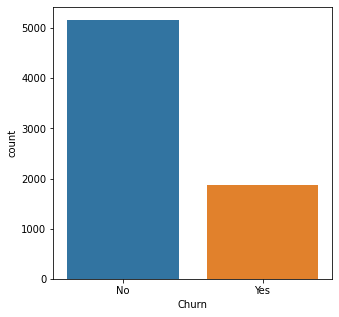

In [12]:
#Visualization
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,5))
ax = sn.countplot(x = telecom_churn1['Churn'], data = telecom_churn1)
plt.show()

In [13]:
#Visualization for few features
plots = {1 : [111], 2:[121,122], 3:[131,132,133], 4:[221,222,223,224], 5:[231,232,233,234,235],
         6:[231,232,233,234,235,236]}

def countplot(x, y, telecom_churn1):
  r = int(str(plots[len(y)][0])[0])
  c = int(str(plots[len(y)][0])[1])
  plt.figure(figsize = (7*c, 7*r))
  for i, j in enumerate(y):
    plt.subplot(plots[len(y)][i])
    ax = sn.countplot( x = j, hue = x, data = telecom_churn1)
    ax.set_title(j)
    
  return plt.show()



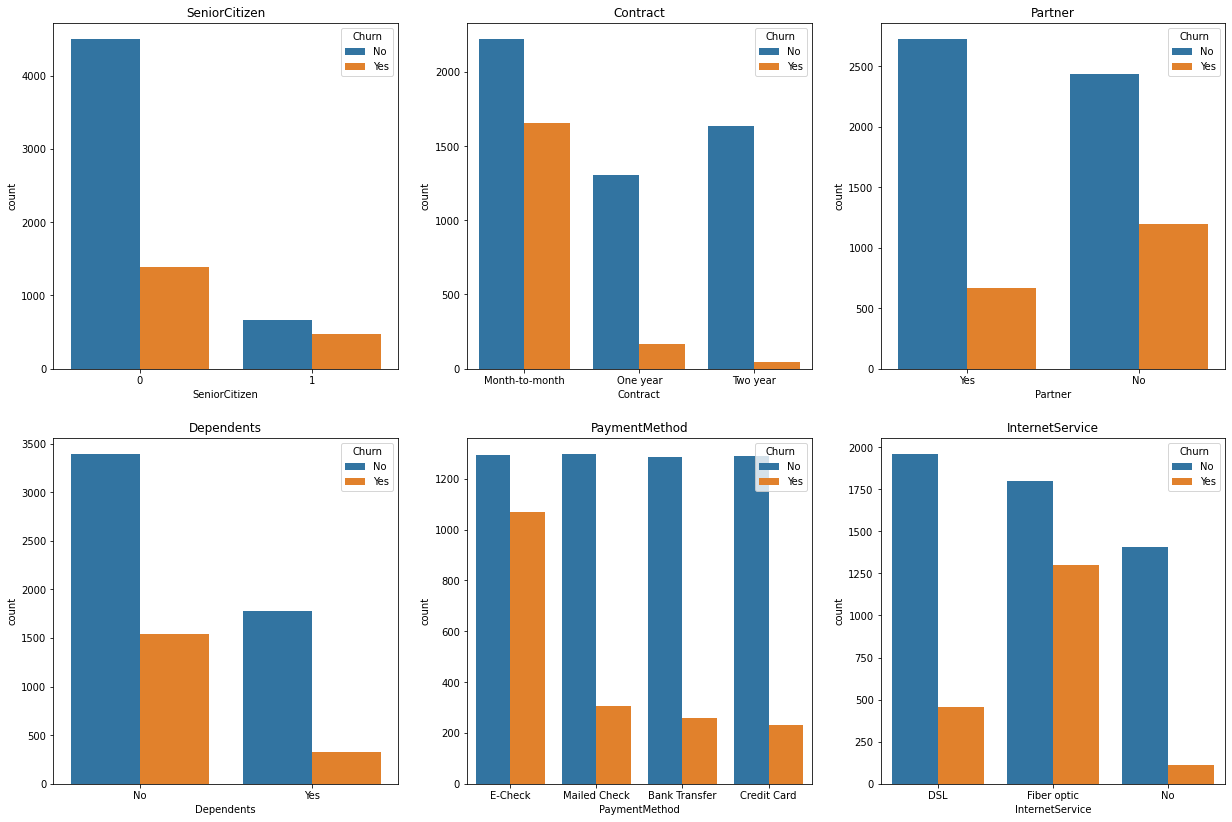

In [15]:
countplot("Churn",['SeniorCitizen','Contract','Partner','Dependents','PaymentMethod','InternetService'], telecom_churn1)

Checking Outliers

In [16]:
#Check for outliers by applying the IQR method, checking if values are way outside the IQR borders
numerical_features = ["tenure", "MonthlyCharges","TotalCharges"]
df_num = telecom_churn1[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

IQR = Q3 - Q1
IQR


tenure              46.0000
MonthlyCharges      54.2750
TotalCharges      3393.2875
dtype: float64

In [17]:
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()


tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

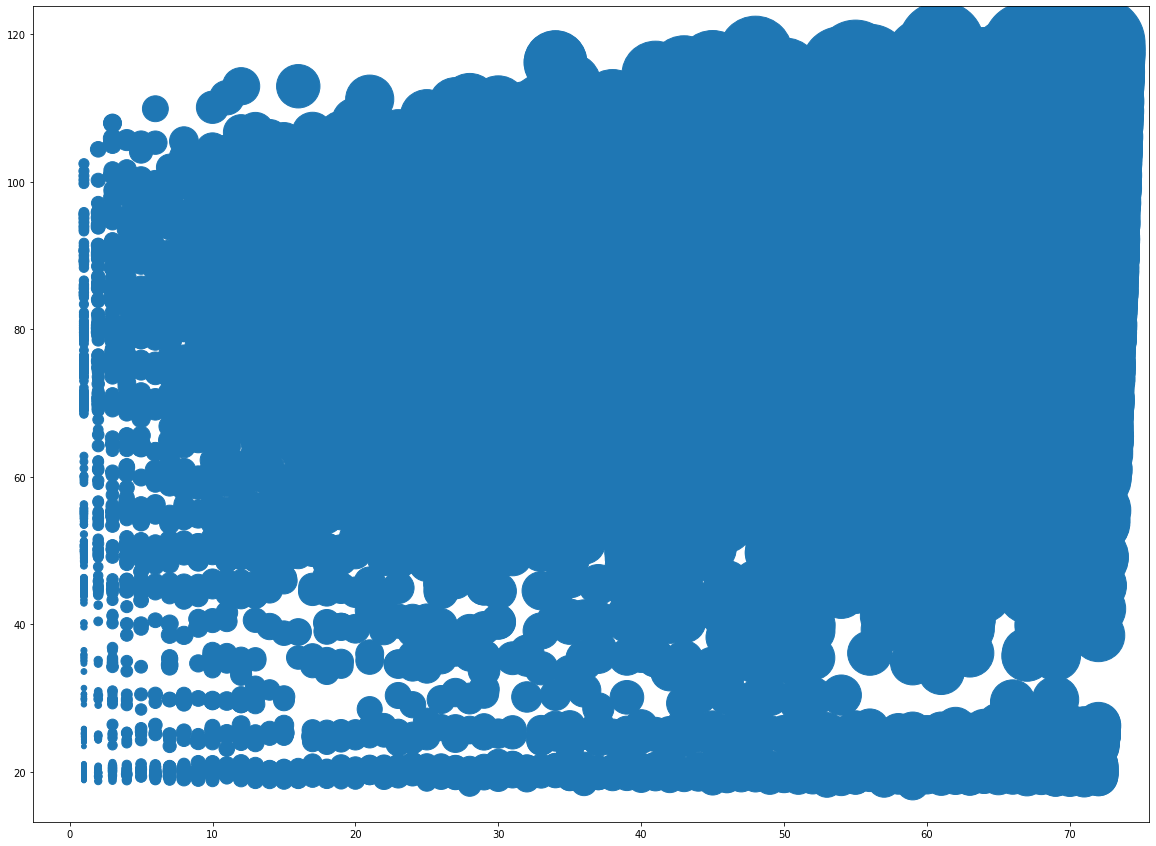

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(telecom_churn1['tenure'], telecom_churn1['MonthlyCharges'], telecom_churn1['TotalCharges'])
# ax.set_xlabel('proportion of non-retail business acre per town')
# ax.set_ylabel('full-value property-tax per $10000')
plt.show()

Data Cleaning

In [19]:
telecom_churn1 = telecom_churn1.drop(columns = 'customerID')

Feature Selection/ Generation

In [20]:
telecom_churn1['Number_AdditionalServices'] = (telecom_churn1[['OnlineSecurity','DeviceProtection', 'StreamingMovies', 'TechSupport','StreamingTV','OnlineBackup']] == 'Yes').sum(axis=1)

In [21]:
print(telecom_churn1['Number_AdditionalServices'])

0       1
1       2
2       2
3       3
4       0
       ..
7038    5
7039    4
7040    1
7041    0
7042    5
Name: Number_AdditionalServices, Length: 7032, dtype: int64


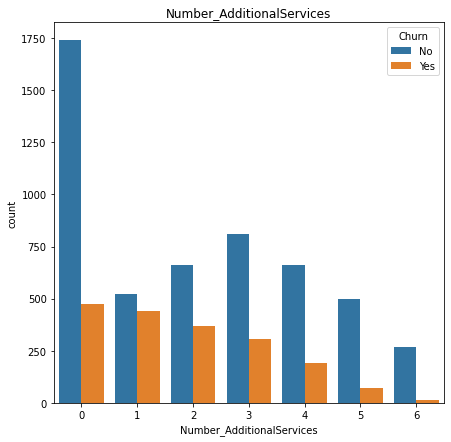

In [22]:
countplot('Churn', ['Number_AdditionalServices'],telecom_churn1)

In [23]:
telecom_churn1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7032 non-null   object 
 1   SeniorCitizen              7032 non-null   int64  
 2   Partner                    7032 non-null   object 
 3   Dependents                 7032 non-null   object 
 4   tenure                     7032 non-null   int64  
 5   PhoneService               7032 non-null   object 
 6   MultipleLines              7032 non-null   object 
 7   InternetService            7032 non-null   object 
 8   OnlineSecurity             7032 non-null   object 
 9   OnlineBackup               7032 non-null   object 
 10  DeviceProtection           7032 non-null   object 
 11  TechSupport                7032 non-null   object 
 12  StreamingTV                7032 non-null   object 
 13  StreamingMovies            7032 non-null   objec

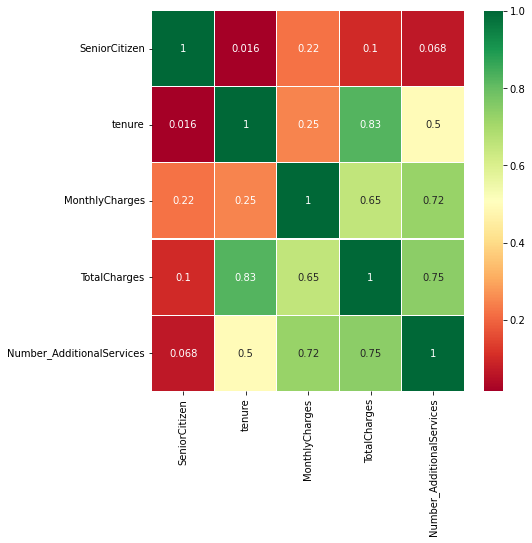

In [24]:
#HeatMap
import seaborn as sns
corrmat = telecom_churn1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(7,7))
#plot heat map
# sns.set(rc = {'figure.figsize':(10,8)})
# g=sns.heatmap(telecom_churn1[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn", linewidths = 0.1)

In [25]:
#ONE_HOT_ENCODING
features_ohe = ['MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection', 'StreamingMovies', 'TechSupport','StreamingTV','Contract','PaymentMethod','Number_AdditionalServices']
telecom_churn1= pd.get_dummies(telecom_churn1,columns = features_ohe)

telecom_churn1['DeviceProtection_Yes']

0       0
1       1
2       0
3       1
4       0
       ..
7038    1
7039    1
7040    0
7041    0
7042    1
Name: DeviceProtection_Yes, Length: 7032, dtype: uint8

In [26]:
#LABEL_ENCODING
features_le = ['gender','Partner','Dependents','Churn','PhoneService','PaperlessBilling']
def label_encoding(features,telecom_churn1):
  for i in features:
    telecom_churn1[i] = telecom_churn[i].map({'Yes':1,'No':0})
  return
label_encoding(['Partner','Dependents','Churn','PhoneService','PaperlessBilling'],telecom_churn1)
telecom_churn1['gender'] = telecom_churn1['gender'].map({'Female' : 1,'Male' : 0})

In [27]:
#MIN_MAX_SCALING
from sklearn.preprocessing import MinMaxScaler
features_mms = ['tenure','TotalCharges','MonthlyCharges']
df_features_mms = pd.DataFrame(telecom_churn1, columns = features_mms)
df_remaining_features = telecom_churn1.drop(columns = features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns = features_mms, index = df_remaining_features.index)
telecom_churn1 = pd.concat([df_remaining_features, df_rescaled_features], axis =1)
#telecom_churn1.info()
telecom_churn1['TotalCharges']

0       0.001275
1       0.215867
2       0.010310
3       0.210241
4       0.015330
          ...   
7038    0.227521
7039    0.847461
7040    0.037809
7041    0.033210
7042    0.787641
Name: TotalCharges, Length: 7032, dtype: float64

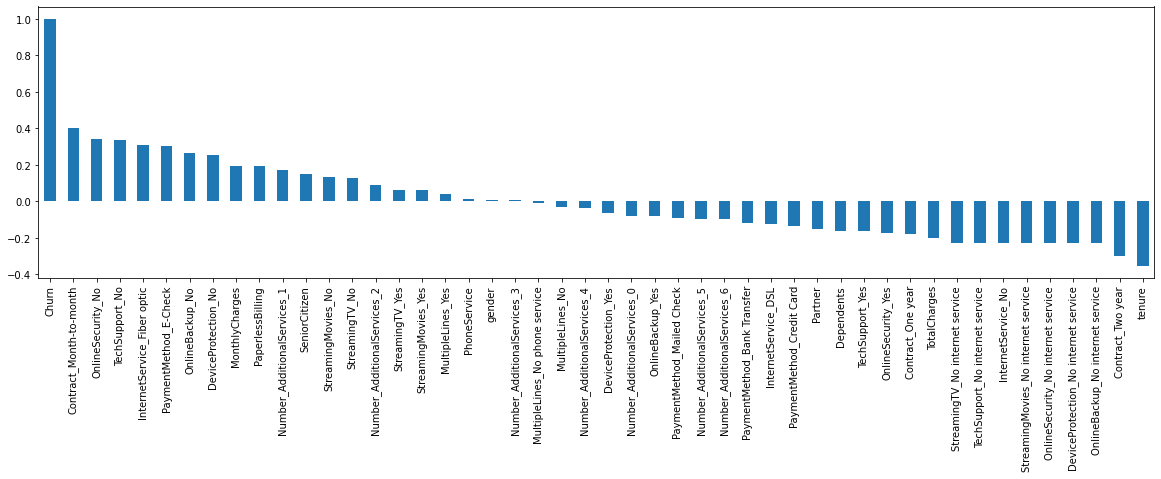

In [28]:
#CORRELATION_PLOT
plt.figure(figsize = (16,10))
telecom_churn1.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', figsize = (20,5))

In [29]:
#DATA_SPLIT
from sklearn.model_selection import train_test_split
X1 = telecom_churn1.drop('Churn', axis =1)
X = X1.values
y = telecom_churn1['Churn'].values
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
# counter = Counter(y_train)
# print(counter)

In [30]:
# # transform the training dataset

# oversample = SMOTE(random_state = 0) 
# X_train, y_train = oversample.fit_resample(X_train, y_train.ravel())


# # summarize the new class distribution of the training dataset
# counter = Counter(y_train)
# print(counter)

Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

#Make predictions ( classes and probabilities) with the trained model on the test set
y_prediction_rf=rf.predict(X_test)
y_prediction_prob_rf = rf.predict_proba(X_test)
print(y_train)
from sklearn import metrics
rf_matrix = metrics.confusion_matrix(y_test, y_prediction_rf)
rf_matrix


[1 1 1 ... 0 0 1]


array([[929, 104],
       [196, 178]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


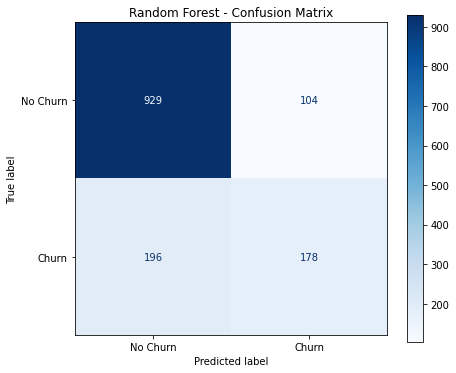

Accuracy Score Test: 0.7867803837953091
Accuracy Score Train: 0.9976888888888888
Accuracy Score Train: 0.7867803837953091


In [32]:
###Confusion Matrix
fig, ax = plt.subplots(figsize=(7,6))

plot_confusion_matrix(rf, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax = ax)
ax.set_title('Random Forest - Confusion Matrix')  
plt.show()

print(f'Accuracy Score Test: {accuracy_score(y_test, y_prediction_rf)}') #same
print(f'Accuracy Score Train: {rf.score(X_train, y_train)}')
print(f'Accuracy Score Train: {rf.score(X_test, y_test)}')   #same

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


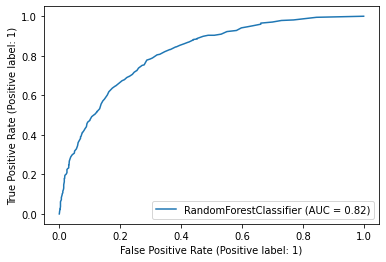

In [33]:
metrics.plot_roc_curve(rf, X_test, y_test) 

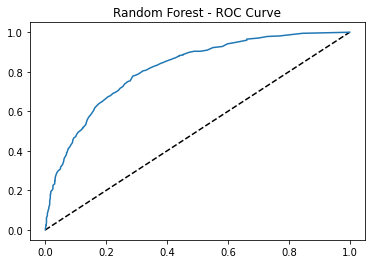

AUC Score (ROC): 0.8155041388200093



In [34]:
#### ROC Curve
y_pred_prob_rf = y_prediction_prob_rf[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'Random Forest')
plt.xlabel = ('False positive Rate')
plt.ylabel = ('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.show()
print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob_rf)}\n')

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, y_prediction_rf))
print("Precision:",metrics.precision_score(y_test, y_prediction_rf))
print("Recall:",metrics.recall_score(y_test, y_prediction_rf))

Accuracy: 0.7867803837953091
Precision: 0.6312056737588653
Recall: 0.47593582887700536


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prediction_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



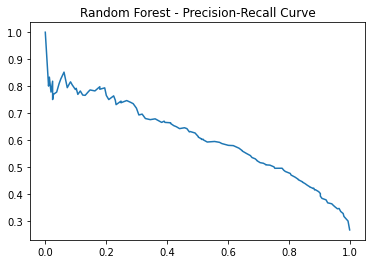

F1 Score: 0.5426829268292683 
 AUC Score (PR): 0.6102308711346536



In [37]:
y_pred_prob_rf = y_prediction_prob_rf[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_rf)

plt.plot(recall,precision, label = 'Random Forest')
plt.xlabel = ('Recall')
plt.ylabel = ('Precision')
plt.title('Random Forest - Precision-Recall Curve')
plt.show()

f1_score_result, auc_score_result = f1_score(y_test, y_prediction_rf), auc(recall,precision)
print(f'F1 Score: {f1_score_result} \n AUC Score (PR): {auc_score_result}\n')

Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Make predictions ( classes and probabilities) with the trained model on the test set
y_predict_lr=lr.predict(X_test)
y_prediction_prob_lr = lr.predict_proba(X_test)
print(y_train)
from sklearn import metrics
lr_matrix = metrics.confusion_matrix(y_test, y_predict_lr)
lr_matrix


[1 1 1 ... 0 0 1]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[920, 113],
       [180, 194]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


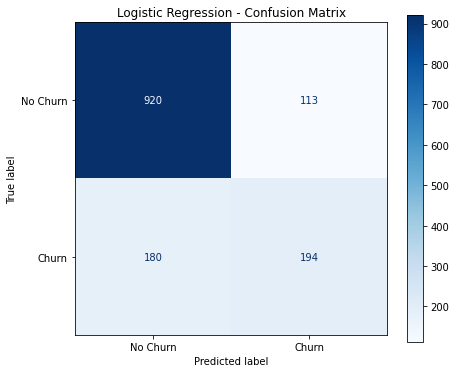

Accuracy Score Test: 0.7917555081734187
Accuracy Score Train: 0.8071111111111111


In [39]:
###Confusion Matrix
fig, ax = plt.subplots(figsize=(7,6))

plot_confusion_matrix(lr, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax = ax)
ax.set_title('Logistic Regression - Confusion Matrix')  
plt.show()

print(f'Accuracy Score Test: {accuracy_score(y_test, y_predict_lr)}')
print(f'Accuracy Score Train: {lr.score(X_train, y_train)}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


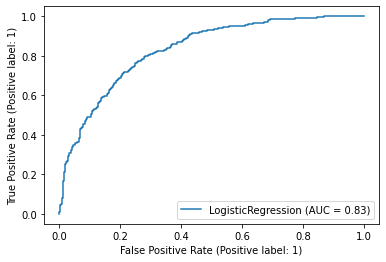

In [40]:
metrics.plot_roc_curve(lr, X_test, y_test)

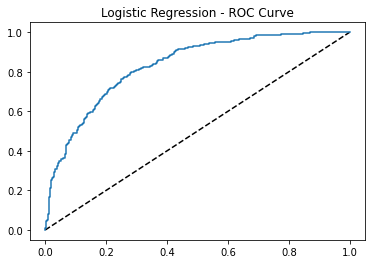

AUC Score (ROC): 0.8318821148101943



In [41]:
##ROC Curve
y_pred_prob_lr = y_prediction_prob_lr[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'Logistic Regression')
plt.xlabel = ('False positive Rate')
plt.ylabel = ('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.show()
print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob_lr)}\n')

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_lr))
print("Precision:",metrics.precision_score(y_test, y_predict_lr))
print("Recall:",metrics.recall_score(y_test, y_predict_lr))

Accuracy: 0.7917555081734187
Precision: 0.6319218241042345
Recall: 0.5187165775401069


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



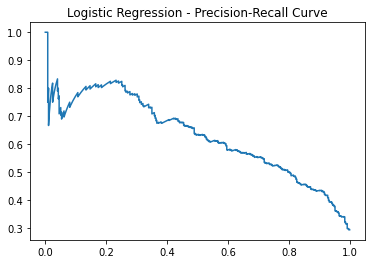

F1 Score: 0.5697503671071952 
 AUC Score (PR): 0.6304107619756213



In [44]:
y_pred_prob_lr = y_prediction_prob_lr[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_lr)

plt.plot(recall,precision, label = 'Logistic Regression')
plt.xlabel = ('Recall')
plt.ylabel = ('Precision')
plt.title('Logistic Regression - Precision-Recall Curve')
plt.show()

f1_score_result_lr, auc_score_result_lr = f1_score(y_test, y_predict_lr), auc(recall,precision)
print(f'F1 Score: {f1_score_result_lr} \n AUC Score (PR): {auc_score_result_lr}\n')

Linear SVC

In [45]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train)

y_predict_linear=svm.predict(X_test)
print(y_train)
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test, y_predict_linear)
svm_matrix


[1 1 1 ... 0 0 1]


array([[923, 110],
       [182, 192]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


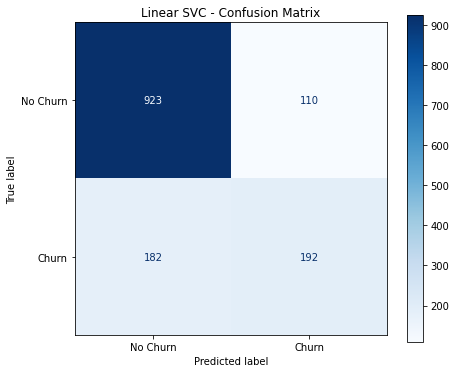

Accuracy Score Test: 0.7924662402274343
Accuracy Score Train: 0.8062222222222222


In [46]:
## Confusion Matrix
fig, ax = plt.subplots(figsize=(7,6))

plot_confusion_matrix(svm, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax = ax)
ax.set_title('Linear SVC - Confusion Matrix')  
plt.show()

print(f'Accuracy Score Test: {accuracy_score(y_test, y_predict_linear)}')
print(f'Accuracy Score Train: {svm.score(X_train, y_train)}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


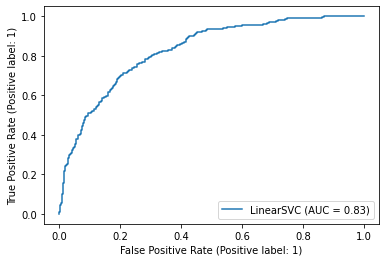

In [47]:
metrics.plot_roc_curve(svm, X_test, y_test)

In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_linear))
print("Precision:",metrics.precision_score(y_test, y_predict_linear))
print("Recall:",metrics.recall_score(y_test, y_predict_linear))

Accuracy: 0.7924662402274343
Precision: 0.6357615894039735
Recall: 0.5133689839572193


In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_linear))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

kmodel = KNeighborsClassifier(n_neighbors=3)
kmodel.fit(X_train, y_train)

#Make predictions ( classes and probabilities) with the trained model on the test set
y_pred_knn=kmodel.predict(X_test)
y_prediction_prob_knn = kmodel.predict_proba(X_test)

from sklearn import metrics
model_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
model_matrix


array([[850, 183],
       [176, 198]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


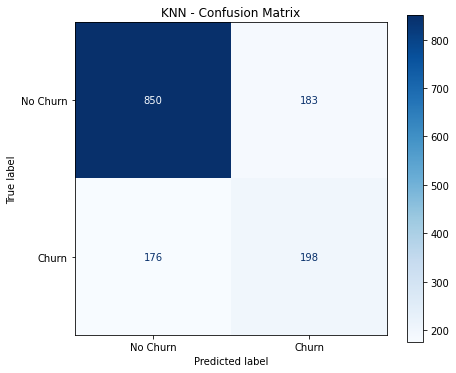

Accuracy Score Test: 0.7448471926083866
Accuracy Score Train: 0.8611555555555556


In [51]:
##Confusion Matrix
fig, ax = plt.subplots(figsize=(7,6))

plot_confusion_matrix(kmodel, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax = ax)
ax.set_title('KNN - Confusion Matrix')  
plt.show()

print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred_knn)}')
print(f'Accuracy Score Train: {kmodel.score(X_train, y_train)}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


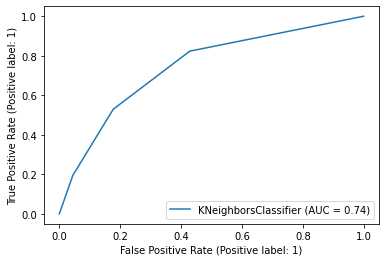

In [52]:
metrics.plot_roc_curve(kmodel, X_test, y_test)

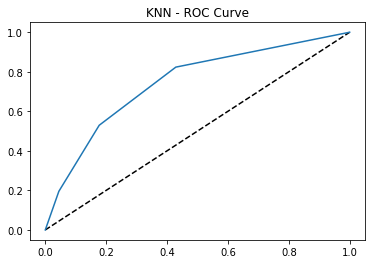

AUC Score (ROC): 0.7434151606607616



In [53]:
## ROC Curve
y_pred_prob_knn = y_prediction_prob_knn[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_knn)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'KNN')
plt.xlabel = ('False positive Rate')
plt.ylabel = ('True Positive Rate')
plt.title('KNN - ROC Curve')
plt.show()
print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob_knn)}\n')

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))

Accuracy: 0.7448471926083866
Precision: 0.5196850393700787
Recall: 0.5294117647058824


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1033
           1       0.52      0.53      0.52       374

    accuracy                           0.74      1407
   macro avg       0.67      0.68      0.68      1407
weighted avg       0.75      0.74      0.75      1407



SVC

In [56]:
from sklearn.svm import SVC
support_vector_m = SVC(kernel = 'rbf', probability = True)
support_vector_m.fit(X_train, y_train)

#Make predictions ( classes and probabilities) with the trained model on the test set
y_predict_svm=support_vector_m.predict(X_test)
y_prediction_prob_svm =support_vector_m.predict_proba(X_test)
print(y_train)
from sklearn import metrics
support_vector_matrix = metrics.confusion_matrix(y_test, y_predict_svm)
support_vector_matrix


[1 1 1 ... 0 0 1]


array([[919, 114],
       [187, 187]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


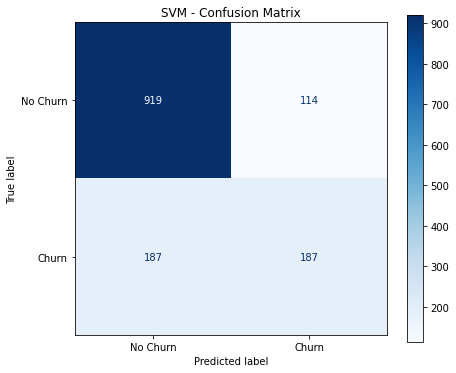

Accuracy Score Test: 0.7860696517412935
Accuracy Score Train: 0.8190222222222222


In [57]:
##Confusion Matrix
fig, ax = plt.subplots(figsize=(7,6))

plot_confusion_matrix(support_vector_m, X_test, y_test, display_labels=["No Churn", "Churn"], cmap=plt.cm.Blues, normalize=None, ax = ax)
ax.set_title('SVM - Confusion Matrix')  
plt.show()

print(f'Accuracy Score Test: {accuracy_score(y_test, y_predict_svm)}')
print(f'Accuracy Score Train: {support_vector_m.score(X_train, y_train)}')


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


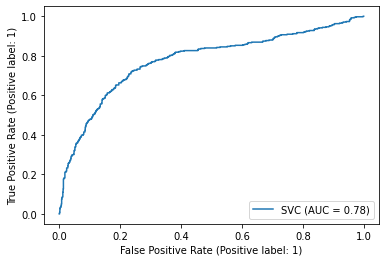

In [58]:
metrics.plot_roc_curve(support_vector_m, X_test, y_test)

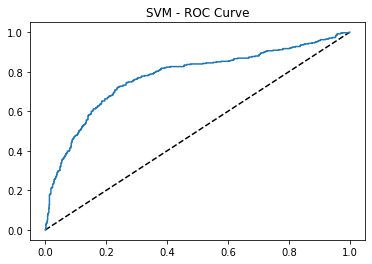

AUC Score (ROC): 0.7763341805964663



In [59]:
##ROC Curve
y_pred_prob_svm = y_prediction_prob_svm[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svm)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label = 'KNN')
plt.xlabel = ('False positive Rate')
plt.ylabel = ('True Positive Rate')
plt.title('SVM - ROC Curve')
plt.show()
print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob_svm)}\n')

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predict_svm))
print("Precision:",metrics.precision_score(y_test, y_predict_svm))
print("Recall:",metrics.recall_score(y_test, y_predict_svm))

Accuracy: 0.7860696517412935
Precision: 0.6212624584717608
Recall: 0.5


FEATURE ANALYSIS

 1) TotalCharges                   0.167290
 2) MonthlyCharges                 0.140847
 3) tenure                         0.138227
 4) Contract_Month-to-month        0.051331
 5) OnlineSecurity_No              0.034571
 6) InternetService_Fiber optic    0.028270
 7) SeniorCitizen                  0.027709
 8) PaymentMethod_E-Check          0.026491
 9) Churn                          0.024342
10) TechSupport_No                 0.022837
11) Dependents                     0.022291
12) Partner                        0.020783
13) PhoneService                   0.019087
14) Contract_Two year              0.016858
15) OnlineBackup_No                0.015936
16) DeviceProtection_No            0.013679
17) PaymentMethod_Credit Card      0.013237
18) MultipleLines_No               0.013182
19) MultipleLines_Yes              0.012906
20) InternetService_DSL            0.012754
21) OnlineSecurity_Yes             0.012228
22) Contract_One year              0.011914
23) PaymentMethod_Bank Transfer 

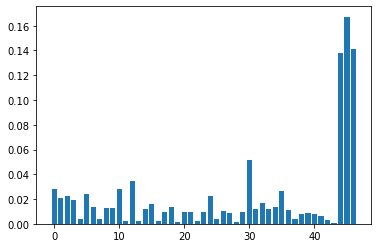

In [61]:
###Feature Importance
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = telecom_churn1.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
plt.bar([x for x in range(len(importances))], importances)
plt.show()

In [62]:
from sklearn.decomposition import PCA, TruncatedSVD
pca = PCA(n_components=20, whiten='True')
X= pca.fit(X_train).transform(X_train)
X


array([[-0.64350278,  0.07575268,  0.09183351, ...,  1.72371355,
         0.38778137, -0.80383963],
       [-0.40818286, -1.19185497,  0.68975974, ...,  0.18863311,
        -1.64663168,  1.57341247],
       [-0.8050353 , -0.63685277, -0.81099083, ...,  0.39122084,
        -0.48853254,  1.07534769],
       ...,
       [-0.73522152, -1.14213039, -0.25538793, ...,  0.43090265,
        -1.2848871 ,  0.9404783 ],
       [ 1.87576667,  0.04286469, -0.14391952, ..., -0.32868209,
        -0.31076084,  0.02028146],
       [-0.66471184, -1.20375917, -0.36536339, ...,  0.13084352,
         1.29940161,  2.08953686]])

In [63]:
pca.explained_variance_

array([2.21156965, 1.20346552, 0.69636867, 0.39633815, 0.33619501,
       0.30829937, 0.29325942, 0.27781695, 0.26335632, 0.25021952,
       0.23805665, 0.22725929, 0.22092922, 0.21600684, 0.20617013,
       0.19243862, 0.16206664, 0.15120884, 0.14368155, 0.13402619])